# Disk Space

---

In [1]:
from oak_cli.evaluation.addons.flops.utils.imports import *

In [2]:
prepare_notebook()

In [3]:
df, normalized_df, singular_run_df, trained_model_df = load_and_prepare_data()

---

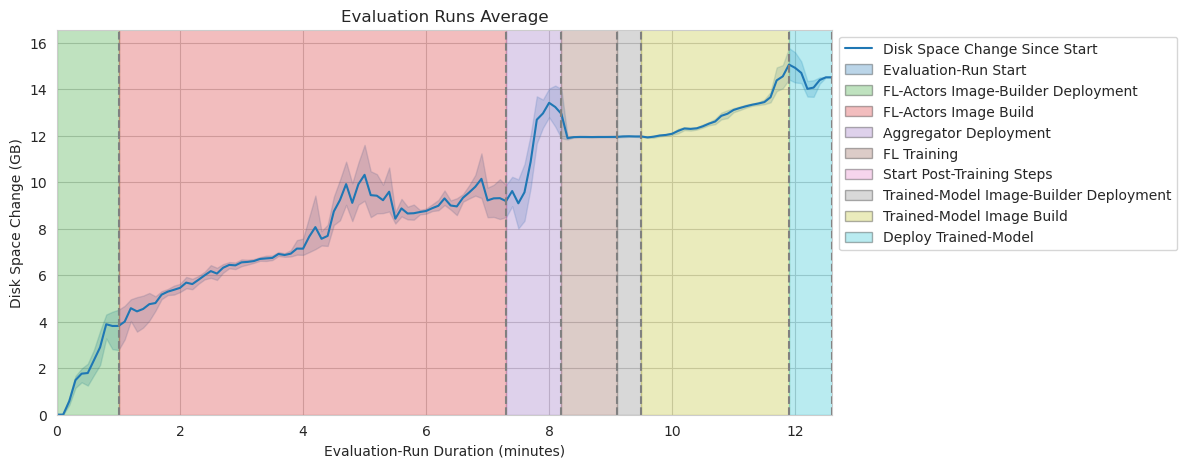

In [4]:
draw_disk_space_linegraph(normalized_df)

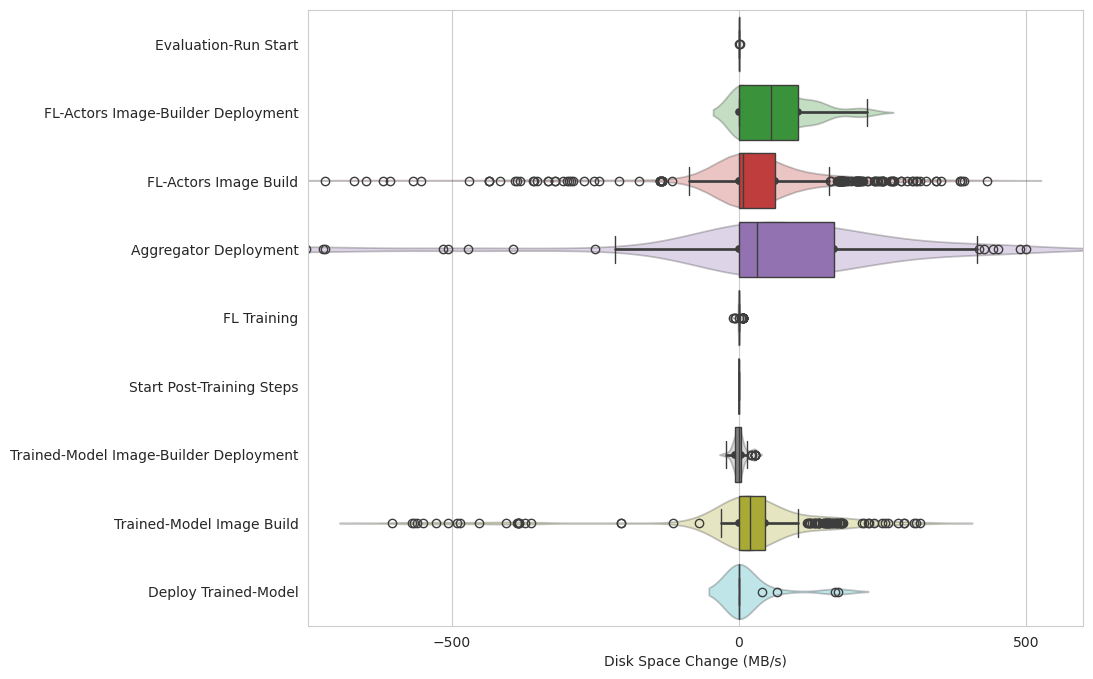

In [5]:
draw_box_violin_plot_for_each_stage_for_disk_space(df)

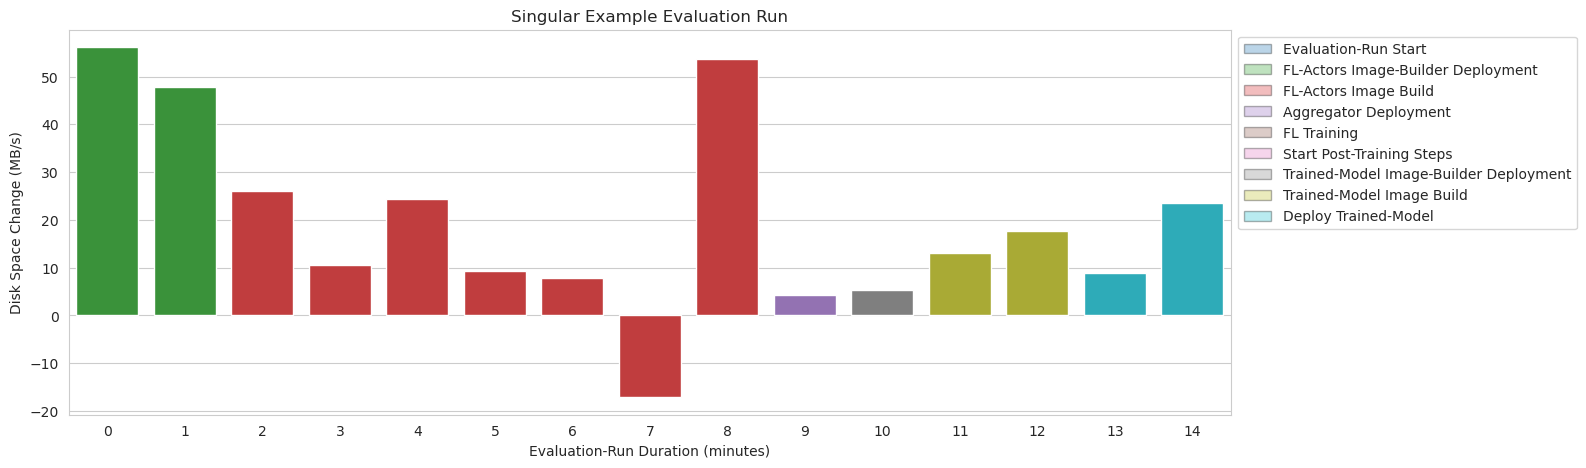

In [6]:
draw_mb_per_second_graph(
    data=df,
    use_bar_plot=True,
    show_confidence_interval=False,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)

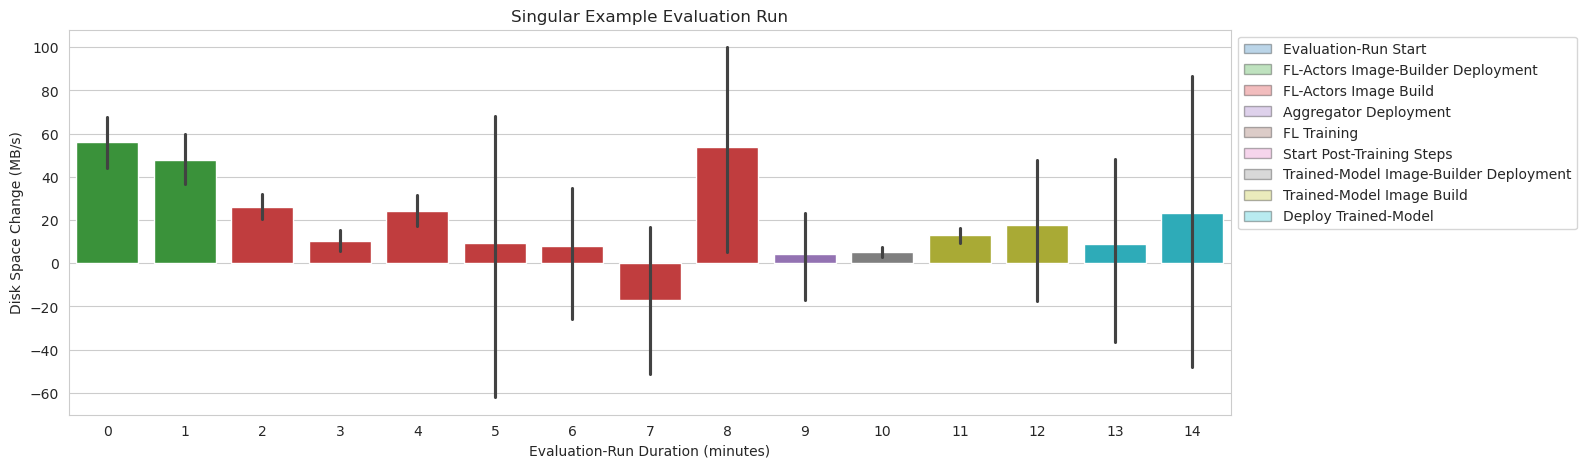

In [7]:
draw_mb_per_second_graph(
    data=df,
    use_bar_plot=True,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)

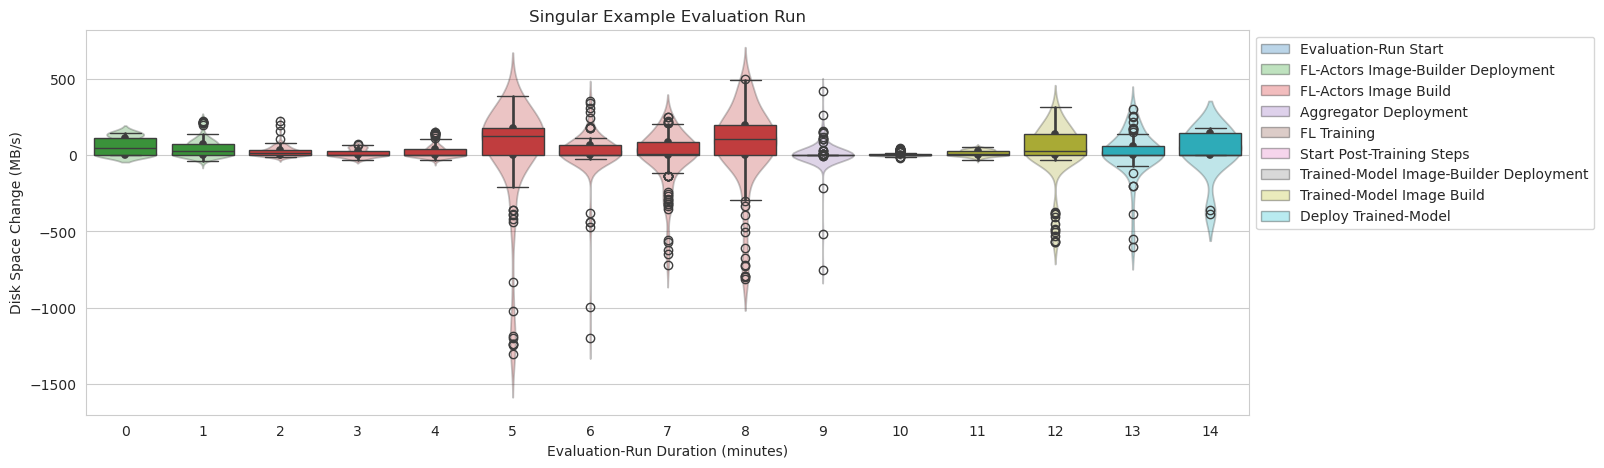

In [8]:
draw_mb_per_second_graph(
    data=df,
    key=DISK_LAST_KEY,
    y_label="Disk Space Change (MB/s)",
)